# Introduction

Real-world data rarely comes clean. Using Python and its libraries, we gathered data from a variety of sources and in a variety of formats including(csv, text or json), assess its quality and tidiness, then clean it. Our wrangling is divided into three phases:

<ul>
<li><a href="#Gather">Gathering data</a>,</li>
<li><a href ="#Assess">Assessing data</a>, and</li>
<li><a href ="#Clean">Cleaning the data</a>. </li>
</ul>
All above stages are documented in this notebook, and showed through analyses and visualizations using Pythons' libraries.

In [43]:
#import packages
import pandas as pd
import wptools
import tweepy as tw
from tweepy import OAuthHandler
import os
import requests
from PIL import Image
from io import BytesIO
from bs4 import BeautifulSoup
import json
from timeit import default_timer as timer
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Gathering data
<a id='Gather'></a>

In [2]:
# read first file
df_enhanced = pd.read_csv('twitter-archive-enhanced.csv')
df_enhanced.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

### Scrapping data from web

In requests we need to ignore the certificate. reference:
https://stackoverflow.com/questions/55746814/httpsconnectionpool-ssl-error-certificate-verify-failed

In [3]:
#scraping file from the below url
url =  'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url, verify = False)

C:\Users\anwar.alshomer\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'd17h27t6h515a5.cloudfront.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


In [4]:
#Save html to file
with open("images_file.tsv", mode='wb') as file: 
    file.write(response.content)

In [5]:
#using beautiful soup to work with html in memory
#soup = BeautifulSoup(response.content, 'lxml')

In [6]:
images_df = pd.read_csv('images_file.tsv', sep = '\t')
images_df.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

In [7]:
file

<_io.BufferedWriter name='images_file.tsv'>

##### Querying Twitter API to download additional data (No. of retweets and favorites)

In [28]:
# These are hidden to comply with Twitter's API terms and conditions
access_token = "Hidden"
access_token_secret = "Hidden"
consumer_key = "Hidden"
consumer_secret = "Hidden"

In [29]:
#Creating api object
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)


In [30]:
# api object
api = tw.API(auth, wait_on_rate_limit=True)

In [31]:
# Extract tweet ids in the first df
tweet_ids = df_enhanced.tweet_id.values
len(tweet_ids)

2356

In [32]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
#failed queries will be stored here
fails_dict = {}
#start time
start = timer()

In [33]:
# Save each tweet's returned JSON as a new line in a tweet_json2.txt file
with open('tweets_json2.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
         
        except tw.TweepError as e:
            #print(e)
            print("Fail")
            fails_dict[tweet_id] = e
            pass
# end timer
end = timer()
#print time
print(end - start)
#Print faile(can't be found) tweets
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

In [54]:
#print no. of failed tweets
len(fails_dict)

29

In [8]:
# List of dictionaries to build and later convert to a DataFrame
tweet_list = []
with open('tweets_json2.txt', encoding='utf-8') as file:
    for tweet in file:
        tweet_list.append(json.loads(tweet))


In [9]:
# print the list of tweets
tweet_list

[{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
  'id': 892420643555336193,
  'id_str': '892420643555336193',
  'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
  'truncated': False,
  'display_text_range': [0, 85],
  'entities': {'hashtags': [],
   'symbols': [],
   'user_mentions': [],
   'urls': [],
   'media': [{'id': 892420639486877696,
     'id_str': '892420639486877696',
     'indices': [86, 109],
     'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
     'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
     'url': 'https://t.co/MgUWQ76dJU',
     'display_url': 'pic.twitter.com/MgUWQ76dJU',
     'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
     'type': 'photo',
     'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
      'medium': {'w': 540, 'h': 528, 'resize': 'fit'},
      'small': {'w': 540, 'h': 528, 'resize': 'fit'}

In [10]:
# List of dictionaries to convert to a DataFrame
# extracted three features: tweet id, favorite count and retweet count
df_tweets = pd.DataFrame(tweet_list, columns = ['id', 'favorite_count', 'retweet_count'])

In [11]:
df_tweets.head()

id  favorite_count  retweet_count
0  892420643555336193           34546           7192
1  892177421306343426           29944           5399
2  891815181378084864           22535           3564
3  891689557279858688           37783           7415
4  891327558926688256           36085           7950

## Assessing data
<a id='Assess'></a>

In [12]:
# visually assessing 'df_enhanced' dataframe
df_enhanced

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
...                  ...                    ...                  ...   
2351  666049248165822465                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                      timestamp  \
0     2017-08-01 16:23:56 +0000   
1     2017-08-01 00:17:27 +0000   
2     2017-07-31 00:18:03 +0000   
3     2017-07-30 15:58:51 +0000   
4     2017-07-29 16:00:24 +0000   
...                         ...   
2351  2015-11-16 00:24:50 +0000   
2352  2015-11-16 00:04:52 +0000   
2353  2015-11-15 23:21:54 +0000   
2354  2015-11-15 23:05:30 +0000   
2355  2015-11-15 22:32:08 +0000   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2351  <a href="http://twitter.com/download/iphone" r...   
2352  <a href="http://twitter.com/download/iphone" r...   
2353  <a href="http://twitter.com/download/iphone" r...   
2354  <a href="http://twitter.com/download/iphone" r...   
2355  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
0     This is Phineas. He's a mystical boy. Only eve...                  NaN   
1     This is Tilly. She's just checking pup on you....                  NaN   
2     This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3     This is Darla. She commenced a snooze mid meal...                  NaN   
4     This is Franklin. He would like you to stop ca...                  NaN   
...                                                 ...                  ...   
2351  Here we have a 1949 1st generation vulpix. Enj...                  NaN   
2352  This is a purebred Piers Morgan. Loves to Netf...                  NaN   
2353  Here is a very happy pup. Big fan of well-main...                  NaN   
2354  This is a western brown Mitsubishi terrier. Up...                  NaN   
2355  Here we have a Japanese Irish Setter. Lost eye...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
0                          NaN                        NaN   
1                          NaN                        NaN   
2                          NaN                        NaN   
3                          NaN                        NaN   
4                          NaN                        NaN   
...                        ...                        ...   
2351                       NaN                        NaN   
2352                       NaN                        NaN   
2353                       NaN                        NaN   
2354                       NaN                        NaN   
2355                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
0     https://twitter.com/dog_rates/status/892420643...                13   
1     https://twitter.com/dog_rates/status/892177421...                13   
2     https://twitter.com/dog_rates/status/891815181...                12   
3     https://twitt

In [13]:
# visually assessing 'images_df' dataframe
images_df

tweet_id                                          jpg_url  \
0     666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
...                  ...                                              ...   
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num                      p1   p1_conf  p1_dog                  p2  \
0           1  Welsh_springer_spaniel  0.465074    True              collie   
1           1                 redbone  0.506826    True  miniature_pinscher   
2           1         German_shepherd  0.596461    True            malinois   
3           1     Rhodesian_ridgeback  0.408143    True             redbone   
4           1      miniature_pinscher  0.560311    True          Rottweiler   
...       ...                     ...       ...     ...                 ...   
2070        2                  basset  0.555712    True    English_springer   
2071        1             paper_towel  0.170278   False  Labrador_retriever   
2072        1               Chihuahua  0.716012    True            malamute   
2073        1               Chihuahua  0.323581    True            Pekinese   
2074        1                  orange  0.097049   False               bagel   

       p2_conf  p2_dog                           p3   p3_conf  p3_dog  
0     0.156665    True            Shetland_sheepdog  0.061428    True  
1     0.074192    True          Rhodesian_ridgeback  0.072010    True  
2     0.138584    True                   bloodhound  0.116197    True  
3     0.360687    True           miniature_pinscher  0.222752    True  
4     0.243682    True                     Doberman  0.154629    True  
...        ...     ...                          ...       ...     ...  
2070  0.225770    True  German_short-haired_pointer  0.175219    True  
2071  0.168086    True                      spatula  0.040836   False  
2072  0.078253    True                       kelpie  0.031379    True  
2073  0.090647    True                     papillon  0.068957    True  
2074  0.085851   False                       banana  0.076110   False  

[2075 rows x 12 columns]

In [14]:
# visually assessing 'images_df' dataframe
df_tweets

id  favorite_count  retweet_count
0     892420643555336193           34546           7192
1     892177421306343426           29944           5399
2     891815181378084864           22535           3564
3     891689557279858688           37783           7415
4     891327558926688256           36085           7950
...                  ...             ...            ...
2322  666049248165822465              92             37
2323  666044226329800704             252            118
2324  666033412701032449             102             37
2325  666029285002620928             116             40
2326  666020888022790149            2319            436

[2327 rows x 3 columns]

In [15]:
df_enhanced.sample(20)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
2027  671874878652489728                    NaN                  NaN   
1728  679872969355714560                    NaN                  NaN   
98    873213775632977920                    NaN                  NaN   
1926  674053186244734976                    NaN                  NaN   
2089  670789397210615808                    NaN                  NaN   
251   844979544864018432           7.590995e+17         4.196984e+09   
1898  674690135443775488                    NaN                  NaN   
795   773308824254029826                    NaN                  NaN   
606   798340744599797760                    NaN                  NaN   
2347  666057090499244032                    NaN                  NaN   
1247  711652651650457602                    NaN                  NaN   
637   793286476301799424                    NaN                  NaN   
95    873697596434513921                    NaN                  NaN   
1650  683515932363329536                    NaN                  NaN   
935   753398408988139520                    NaN                  NaN   
2112  670435821946826752                    NaN                  NaN   
368   828708714936930305                    NaN                  NaN   
704   785872687017132033                    NaN                  NaN   
995   748346686624440324                    NaN                  NaN   
811   771171053431250945                    NaN                  NaN   

                      timestamp  \
2027  2015-12-02 02:13:48 +0000   
1728  2015-12-24 03:55:21 +0000   
98    2017-06-09 16:22:42 +0000   
1926  2015-12-08 02:29:37 +0000   
2089  2015-11-29 02:20:29 +0000   
251   2017-03-23 18:29:57 +0000   
1898  2015-12-09 20:40:38 +0000   
795   2016-09-06 23:56:05 +0000   
606   2016-11-15 01:44:00 +0000   
2347  2015-11-16 00:55:59 +0000   
1247  2016-03-20 20:36:28 +0000   
637   2016-11-01 03:00:09 +0000   
95    2017-06-11 00:25:14 +0000   
1650  2016-01-03 05:11:12 +0000   
935   2016-07-14 01:19:12 +0000   
2112  2015-11-28 02:55:30 +0000   
368   2017-02-06 20:55:28 +0000   
704   2016-10-11 16:00:24 +0000   
995   2016-06-30 02:45:28 +0000   
811   2016-09-01 02:21:21 +0000   

                                                 source  \
2027  <a href="http://twitter.com/download/iphone" r...   
1728  <a href="http://vine.co" rel="nofollow">Vine -...   
98    <a href="http://twitter.com/download/iphone" r...   
1926  <a href="http://twitter.com/download/iphone" r...   
2089  <a href="http://twitter.com/download/iphone" r...   
251   <a href="http://twitter.com/download/iphone" r...   
1898  <a href="http://twitter.com/download/iphone" r...   
795   <a href="http://twitter.com/download/iphone" r...   
606   <a href="http://twitter.com/download/iphone" r...   
2347  <a href="http://twitter.com/download/iphone" r...   
1247  <a href="http://twitter.com/download/iphone" r...   
637   <a href="http://twitter.com/download/iphone" r...   
95    <a href="http://twitter.com/download/iphone" r...   
1650  <a href="http://vine.co" rel="nofollow">Vine -...   
935   <a href="http://twitter.com/download/iphone" r...   
2112  <a href="http://twitter.com/download/iphone" r...   
368   <a href="http://twitter.com/download/iphone" r...   
704   <a href="http://twitter.com/download/iphone" r...   
995   <a href="http://twitter.com/download/iphone" r...   
811   <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
2027  This is Mia. She was specifically told not get...                  NaN   
1728  This is Rocco. He's in a very intense game of ...                  NaN   
98    This is Sierra. She's one precious pupper. Abs...                  NaN   
1926  This is Stanley. Yes he is aware of the spoon'...                  NaN   
2089  Two obedient dogs here. Left one has extra leg...                  NaN   
251   PUPDATE: I'm proud to announce that Toby 

In [16]:
df_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [17]:
# check the values of name
df_enhanced.name.value_counts()

None        745
a            55
Charlie      12
Lucy         11
Oliver       11
           ... 
Olaf          1
Flurpson      1
Beemo         1
Tommy         1
Spanky        1
Name: name, Length: 957, dtype: int64

In [18]:
#check the values of rating_numerator
df_enhanced.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
0         2
15        2
75        2
420       2
182       1
204       1
143       1
121       1
99        1
20        1
45        1
27        1
17        1
24        1
26        1
44        1
50        1
60        1
80        1
84        1
88        1
1776      1
960       1
666       1
144       1
165       1
Name: rating_numerator, dtype: int64

In [19]:
#check the values of rating_denominator
df_enhanced.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
0         1
120       1
7         1
170       1
150       1
130       1
90        1
110       1
2         1
70        1
40        1
16        1
15        1
Name: rating_denominator, dtype: int64

In [20]:
# check for duplicated records
df_enhanced.duplicated().sum()

0

In [21]:
#Check for retweeted tweets
df_enhanced.retweeted_status_id.count()

181

In [22]:
images_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 119.6+ KB


In [23]:
#check for duplicated records in images_df
images_df.duplicated().sum()

0

In [24]:
# assess df_tweets programmatically
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2327 non-null   int64
 1   favorite_count  2327 non-null   int64
 2   retweet_count   2327 non-null   int64
dtypes: int64(3)
memory usage: 54.6 KB


In [25]:
#check for duplicated records in df_tweets
df_tweets.duplicated().sum()

0

In [26]:
# check if there is any duplicated columns in the dataframes beside 'tweet_id'
all_columns = pd.Series(list(df_enhanced) + list(images_df) + list(df_tweets))
all_columns[all_columns.duplicated()]

17    tweet_id
dtype: object

### Quality issues

- Different number of rows in each data frame.
- Drop retweeted tweets
#### 1- df_enhanced
- Missing values in cols (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, name, doggo, floofer, pupper and puppo.
- change the data type of tweet_id to string
- change the data type of timestamp col to datetime.
- remove unwanted columns
- There are two 0 values in rating_numerator col.
- Some values in rating_denominator are not equal 10.
- Incorrect name values  "a" in name col.
- None values in doggo, floofer, pupper and puppo.
- Multiple dog stages in one record
- There are some decimal rating in rating_numerator col.

#### 2- images_df
- change the data type of tweet_id to string
- Missing records only 2075 rows.
#### 3- df_tweets
- Rename "id" column to "tweet_id"
- change the data type of id to string
- Missing records only 2327 rows.
### Tidiness issues
- The columns in "df_enhanced" (doggo, floofer, pupper and puppo) should be one column dog_stage
- All 3 data frames should be merged into one

## Cleaning data
<a id='Clean'></a>

This section is structured as: 
- Define: where we define the issue
- Code: code to clean the issue
- Test: to check if the issue is disappeared.

In [27]:
# Create a copy of each data frame to keep our original dfs
df_enhanced_clean = df_enhanced.copy()
images_df_clean = images_df.copy()
df_tweets_clean = df_tweets.copy()

**Define**

Rename the column 'id' in df_tweets_clean to 'tweet_id' using pandas rename() function. SO, we can combine all dfs

 **Code**

In [28]:
# rename id col to tweet_id
df_tweets_clean.rename(columns = {'id' : 'tweet_id'}, inplace =True)

**Test**

In [29]:
df_tweets_clean.head(1)

tweet_id  favorite_count  retweet_count
0  892420643555336193           34546           7192

**Define**

Handle None values in doggo, floofer, pupper and puppo.

**Code**

In [30]:
df_enhanced_clean.doggo.replace('None', '', inplace=True)
df_enhanced_clean.floofer.replace('None', '', inplace=True)
df_enhanced_clean.pupper.replace('None', '', inplace=True)
df_enhanced_clean.puppo.replace('None', '', inplace=True)

**Test**

In [34]:
df_enhanced_clean.sample(20)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
138   865718153858494464                    NaN                  NaN   
1836  676098748976615425                    NaN                  NaN   
1082  738883359779196928                    NaN                  NaN   
2180  669000397445533696                    NaN                  NaN   
108   871515927908634625                    NaN                  NaN   
1022  746542875601690625                    NaN                  NaN   
1491  692894228850999298                    NaN                  NaN   
1835  676101918813499392                    NaN                  NaN   
655   791784077045166082                    NaN                  NaN   
1581  687124485711986689                    NaN                  NaN   
2318  666454714377183233                    NaN                  NaN   
1391  700143752053182464                    NaN                  NaN   
105   872122724285648897                    NaN                  NaN   
2265  667534815156183040                    NaN                  NaN   
1122  730573383004487680                    NaN                  NaN   
2011  672245253877968896                    NaN                  NaN   
1170  720775346191278080                    NaN                  NaN   
1941  673715861853720576                    NaN                  NaN   
1757  678764513869611008                    NaN                  NaN   
2120  670411370698022913                    NaN                  NaN   

                      timestamp  \
138   2017-05-19 23:57:46 +0000   
1836  2015-12-13 17:57:57 +0000   
1082  2016-06-04 00:01:35 +0000   
2180  2015-11-24 03:51:38 +0000   
108   2017-06-04 23:56:03 +0000   
1022  2016-06-25 03:17:46 +0000   
1491  2016-01-29 02:17:12 +0000   
1835  2015-12-13 18:10:33 +0000   
655   2016-10-27 23:30:09 +0000   
1581  2016-01-13 04:10:18 +0000   
2318  2015-11-17 03:16:00 +0000   
1391  2016-02-18 02:24:13 +0000   
105   2017-06-06 16:07:15 +0000   
2265  2015-11-20 02:47:56 +0000   
1122  2016-05-12 01:40:42 +0000   
2011  2015-12-03 02:45:32 +0000   
1170  2016-04-15 00:46:48 +0000   
1941  2015-12-07 04:09:13 +0000   
1757  2015-12-21 02:30:45 +0000   
2120  2015-11-28 01:18:21 +0000   

                                                 source  \
138   <a href="http://twitter.com/download/iphone" r...   
1836  <a href="http://twitter.com/download/iphone" r...   
1082  <a href="http://twitter.com/download/iphone" r...   
2180  <a href="http://twitter.com/download/iphone" r...   
108   <a href="http://twitter.com/download/iphone" r...   
1022  <a href="http://vine.co" rel="nofollow">Vine -...   
1491  <a href="http://twitter.com/download/iphone" r...   
1835  <a href="http://twitter.com/download/iphone" r...   
655   <a href="http://twitter.com/download/iphone" r...   
1581  <a href="http://twitter.com/download/iphone" r...   
2318  <a href="http://twitter.com/download/iphone" r...   
1391  <a href="http://twitter.com/download/iphone" r...   
105   <a href="http://twitter.com/download/iphone" r...   
2265  <a href="http://twitter.com" rel="nofollow">Tw...   
1122  <a href="http://twitter.com/download/iphone" r...   
2011  <a href="http://twitter.com/download/iphone" r...   
1170  <a href="http://twitter.com/download/iphone" r...   
1941  <a href="http://twitter.com/download/iphone" r...   
1757  <a href="http://twitter.com/download/iphone" r...   
2120  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
138   Meet Boomer. He's just checking pup on you. Ho...                  NaN   
1836  Extremely rare pup here. Very religious. Alway...                  NaN   
1082  When a single soap orb changes your entire per...                  NaN   
2180  Meet Terrance. He's being yelled at because he...                  NaN   
108   This is Napolean. He's a Raggedy East Nicaragu...                  NaN   
1022  Here's a golden floofer helping with the 

#### Cleaning Tidiness issues:

**Define**

- Create new col 'dog_stages' extracted from 'text' using str.extract() and 
- Drop (doggo, floofer,pupper and puppo) cols.

**Code**

In [35]:
# Create new col 'dog_stages' that extracted from 'text'
df_enhanced_clean['dog_stages'] = df_enhanced_clean['text'].str.extract('(doggo|floofer|pupper|puppo)')

In [36]:
#drop doggo,floofer,pupper,puppo cols
labels = ['doggo','floofer','pupper','puppo']
for l in labels:
    df_enhanced_clean.drop(l, axis=1, inplace=True)

**Test**

In [38]:
df_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  dog_stages                  399 n

In [36]:
#check the no. of values in each dog stage
df_enhanced_clean.dog_stages.value_counts()

pupper     265
doggo       93
puppo       37
floofer      4
Name: dog_stages, dtype: int64

**Define**

Handle multiple stages of dog and missing values usinng .loc[]

**Code**

In [41]:
# multiple stages handling
df_enhanced_clean.loc[df_enhanced_clean.dog_stages == 'doggopupper', 'dog_stages'] = 'doggo, pupper'
df_enhanced_clean.loc[df_enhanced_clean.dog_stages == 'doggopuppo', 'dog_stages'] = 'doggo, puppo'
df_enhanced_clean.loc[df_enhanced_clean.dog_stages == 'doggofloofer', 'dog_stages'] = 'doggo, floofer'

In [44]:
# missing values handling
df_enhanced_clean.loc[df_enhanced_clean.dog_stages == '', 'dog_stages'] = np.nan

**Test**

In [46]:
df_enhanced_clean.dog_stages.sample(20)

763        NaN
923     pupper
1114       NaN
1298       NaN
469      puppo
78      pupper
1220    pupper
1443       NaN
146        NaN
491        NaN
957        NaN
1789       NaN
1762       NaN
2320       NaN
632        NaN
1805       NaN
96         NaN
1730       NaN
1386       NaN
835      doggo
Name: dog_stages, dtype: object

**Define**

Combine the three dataframes into one.

**Code**

In [47]:
#first merge df_enhanced_clean and images_df_clean into df1, then merge df1 and df_tweets_clean into df using tweet_id col.
df1 = pd.merge(df_enhanced_clean, images_df_clean, on='tweet_id', how='left') 
df = pd.merge(df1, df_tweets_clean, on='tweet_id', how='left')

**Test**

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  dog_stages                  399 n

**Define**

Delete retweets records

**Code**

In [49]:
# delete retweets
df = df[df['retweeted_status_id'].isnull()]

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  dog_stages                  364 n

In [51]:
# delete retweets columns
df.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace = True)

**Test**

In [52]:
# check if retweets are deleted
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2175 non-null   int64  
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    78 non-null     float64
 3   timestamp              2175 non-null   object 
 4   source                 2175 non-null   object 
 5   text                   2175 non-null   object 
 6   expanded_urls          2117 non-null   object 
 7   rating_numerator       2175 non-null   int64  
 8   rating_denominator     2175 non-null   int64  
 9   name                   2175 non-null   object 
 10  dog_stages             364 non-null    object 
 11  jpg_url                1994 non-null   object 
 12  img_num                1994 non-null   float64
 13  p1                     1994 non-null   object 
 14  p1_conf                1994 non-null   float64
 15  p1_d

**Define**

change the data type of tweet_id to string and timestamp col to datetime

**Code**

In [53]:
df['tweet_id'] = df.tweet_id.astype(str)

In [54]:
df.loc[:, 'timestamp'] = df.loc[:, 'timestamp'].apply(pd.to_datetime)

**Test**

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2175 non-null   object             
 1   in_reply_to_status_id  78 non-null     float64            
 2   in_reply_to_user_id    78 non-null     float64            
 3   timestamp              2175 non-null   datetime64[ns, UTC]
 4   source                 2175 non-null   object             
 5   text                   2175 non-null   object             
 6   expanded_urls          2117 non-null   object             
 7   rating_numerator       2175 non-null   int64              
 8   rating_denominator     2175 non-null   int64              
 9   name                   2175 non-null   object             
 10  dog_stages             364 non-null    object             
 11  jpg_url                1994 non-null   object           

**Define**

Replace incorrect name lowercase with None

**Code**

In [71]:
df['name'] = df.name.str.replace('^[a-z]+', 'None')

<ipython-input-71-6c459157b5bd>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['name'] = df.name.str.replace('^[a-z]+', 'None')


**Test**

In [74]:
df.name.sample(30)

337       Eevee
1846       None
1545       None
1712       None
1147     Sprout
1601    Hammond
614       Romeo
1670    Patrick
2086       None
698       Rizzo
1002       None
1398     Fillup
1101     Dakota
1296      Rufus
41         None
226        None
1717       None
1665       Taco
104       Harry
1986       None
350       Dutch
1942       None
547        Zeke
970      Calvin
1906      Louis
1814       None
1377    Coopson
1539       Luca
1671       Kreg
321      Wilson
Name: name, dtype: object

**Define**

some values of 'rating_denominator' doesn't equal to 10

**Code**

In [55]:
df.rating_denominator = 10

**Test**

In [56]:
df.rating_denominator.value_counts()

10    2175
Name: rating_denominator, dtype: int64

**Define**

There are 0 values in rating_numerator col.

**Code**

In [57]:
#Find the row indices of value (0)
out = df.index[df['rating_numerator'] == 0].tolist()
out

[315, 1016]

In [58]:
# replace 0 values with 10
indices = [315, 1016]
df.loc[indices,'rating_numerator'] = 10

**Test**

In [64]:
# check if there is 0 values in rating_numerator
df[df.rating_numerator == 0].value_counts()

Series([], dtype: int64)

**Define**

Decimal values in rating_numerator column.

**Code**

In [56]:
# change data type of rating_numerator to float
df['rating_numerator'] = df.rating_numerator.astype(float)

In [57]:
# extract the decimal ratings from text
df[df.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

C:\Users\anwar.alshomer\Anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


text  rating_numerator
45    This is Bella. She hopes her smile made you sm...               5.0
695   This is Logan, the Chow who lived. He solemnly...              75.0
763   This is Sophie. She's a Jubilant Bush Pupper. ...              27.0
1689  I've been told there's a slight possibility he...               5.0
1712  Here we have uncovered an entire battalion of ...              26.0

**Test**

In [58]:
df.rating_numerator.value_counts()

12.0      500
10.0      442
11.0      426
13.0      307
9.0       156
8.0        98
7.0        54
14.0       43
5.0        36
6.0        32
3.0        19
4.0        17
2.0         9
1.0         8
0.0         2
420.0       2
26.0        1
99.0        1
165.0       1
84.0        1
182.0       1
60.0        1
75.0        1
88.0        1
17.0        1
1776.0      1
80.0        1
15.0        1
20.0        1
144.0       1
27.0        1
121.0       1
50.0        1
204.0       1
960.0       1
45.0        1
24.0        1
666.0       1
44.0        1
143.0       1
Name: rating_numerator, dtype: int64

**Define**

Remove records with missing images

**Code**

In [59]:
df = df[df['jpg_url'].notnull()]

**Test**

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1994 non-null   object             
 1   in_reply_to_status_id  23 non-null     float64            
 2   in_reply_to_user_id    23 non-null     float64            
 3   timestamp              1994 non-null   datetime64[ns, UTC]
 4   source                 1994 non-null   object             
 5   text                   1994 non-null   object             
 6   expanded_urls          1994 non-null   object             
 7   rating_numerator       1994 non-null   float64            
 8   rating_denominator     1994 non-null   int64              
 9   name                   1994 non-null   object             
 10  dog_stages             326 non-null    object             
 11  jpg_url                1994 non-null   object           

**Define**

Remove records with missing favorites and retweets

**Code**

In [61]:
df = df[df['favorite_count'].notnull()]

**Test**

In [62]:
print(sum(df.favorite_count.isnull()))
print(sum(df.retweet_count.isnull()))

0
0


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1985 entries, 0 to 2355
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1985 non-null   object             
 1   in_reply_to_status_id  23 non-null     float64            
 2   in_reply_to_user_id    23 non-null     float64            
 3   timestamp              1985 non-null   datetime64[ns, UTC]
 4   source                 1985 non-null   object             
 5   text                   1985 non-null   object             
 6   expanded_urls          1985 non-null   object             
 7   rating_numerator       1985 non-null   float64            
 8   rating_denominator     1985 non-null   int64              
 9   name                   1985 non-null   object             
 10  dog_stages             324 non-null    object             
 11  jpg_url                1985 non-null   object           

**Define**

Remove unwanted columns

**Code**

In [64]:
#drop columns
df.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'img_num'], axis=1, inplace = True)

**Test**

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1985 entries, 0 to 2355
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1985 non-null   object             
 1   timestamp           1985 non-null   datetime64[ns, UTC]
 2   source              1985 non-null   object             
 3   text                1985 non-null   object             
 4   expanded_urls       1985 non-null   object             
 5   rating_numerator    1985 non-null   float64            
 6   rating_denominator  1985 non-null   int64              
 7   name                1985 non-null   object             
 8   dog_stages          324 non-null    object             
 9   jpg_url             1985 non-null   object             
 10  p1                  1985 non-null   object             
 11  p1_conf             1985 non-null   float64            
 12  p1_dog              1985 non-null 

### Storing data

In [66]:
# store the df to csv file
df.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing

In [67]:
# value counts of each source
df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1947
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       28
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      10
Name: source, dtype: int64

Tho most commonly used device is iPhone in tweeting

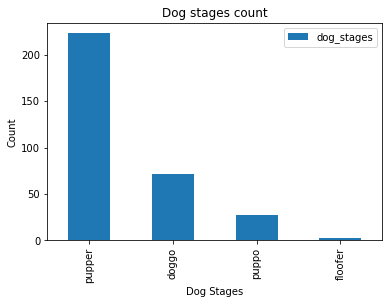

In [68]:
# distribution of dog stages
df.dog_stages.value_counts().plot(kind='bar');
plt.xlabel('Dog Stages')
plt.ylabel('Count')
plt.title('Dog stages count')
plt.legend();

The most common type of dogs is (pupper), where the least is (floofer)

In [69]:
# mean of favorites and retweets
print(df.favorite_count.mean())
print(df.retweet_count.mean())

7888.817128463476
2305.3788413098237


The favorite count is much larger than the retweet count.

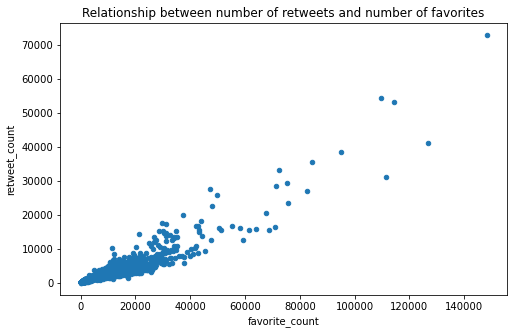

In [70]:
# correlation between favorites count and retweets count
df.plot(x='favorite_count', y='retweet_count', kind = 'scatter', figsize=(8,5))
plt.title('Relationship between number of retweets and number of favorites');

There is a correlation between favorite count and retweet count.